In [1]:
# Imports
import spectral
import numpy as np
from pathlib import Path
import importlib 
import massimal.image_render
import massimal.hyspec_io

%matplotlib inline
import matplotlib.pyplot as plt

import massimal.pipeline

In [2]:
importlib.reload(massimal.pipeline)

<module 'massimal.pipeline' from '/home/mha114/Dropbox/Python/massimal/src/massimal/pipeline.py'>

In [3]:
# Paths
radiance_cailbration_file = '/media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301228-south-test_hsi/calibration/RadiometricCal100121-278_081220.icp'
raw_image_file = Path('/media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301228-south-test_hsi/0_raw/OlbergholmenN-7/OlbergholmenN_Pika_L_7.bil.hdr')
radiance_dir = Path('/media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301228-south-test_hsi/1_radiance')
radiance_image_file = radiance_dir / raw_image_file.name

In [4]:
rd = massimal.pipeline.RadianceCalibrationDataset(radiance_cailbration_file)

INFO: Non-empty calibration directory /media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301228-south-test_hsi/calibration/radiance_calibration_frames
INFO: Skipping unzipping of calibration file, assuming unzipping already done.


In [5]:
dark_frame,wl,metadata,gain,shutter = rd.get_closest_dark_frame(gain=5,shutter=4.819)
print(metadata)

{'interleave': 'bip', 'lines': '1', 'samples': '900', 'bands': '600', 'data type': '12', 'shutter': '5', 'gain': '5.0', 'ceiling': '4095', 'sample binning': '1', 'spectral binning': '1', 'byte order': '0'}


In [6]:
rad_conv_frame,wl,metadata = rd.get_rad_conv_frame()

In [7]:
rad_conv_frame.shape

(1, 900, 600)

In [8]:
raw_image,wl,raw_image_metadata = massimal.pipeline.read_envi(raw_image_file)

In [9]:
rc = massimal.pipeline.RadianceConverter(radiance_calibration_file=radiance_cailbration_file)

INFO: Non-empty calibration directory /media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301228-south-test_hsi/calibration/radiance_calibration_frames
INFO: Skipping unzipping of calibration file, assuming unzipping already done.


In [10]:
rad_image = rc.convert_raw_image_to_radiance(raw_image,raw_image_metadata)

In [11]:
print(f'{rad_image.shape=}')
print(f'{np.min(raw_image)=}, {np.max(raw_image)=}')
print(f'{np.min(rad_image)=}, {np.max(rad_image)=}')

rad_image.shape=(2000, 900, 300)
np.min(raw_image)=0.0, np.max(raw_image)=2722.0
np.min(rad_image)=0, np.max(rad_image)=7515


In [12]:
importlib.reload(massimal.image_render)

<module 'massimal.image_render' from '/home/mha114/Dropbox/Python/massimal/src/massimal/image_render.py'>

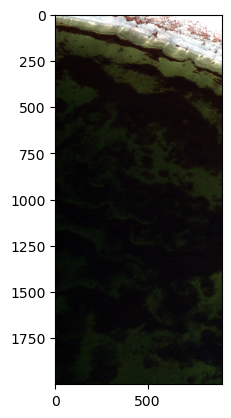

In [13]:
_ = plt.imshow(massimal.image_render.percentile_stretch(rad_image[:,:,(150,100,50)]))

In [14]:
#rc.convert_raw_file_to_radiance(raw_image_file,radiance_image_file)

In [15]:
rad_spec_sand = np.mean(rad_image[0:10,890:899,:],axis=(0,1))

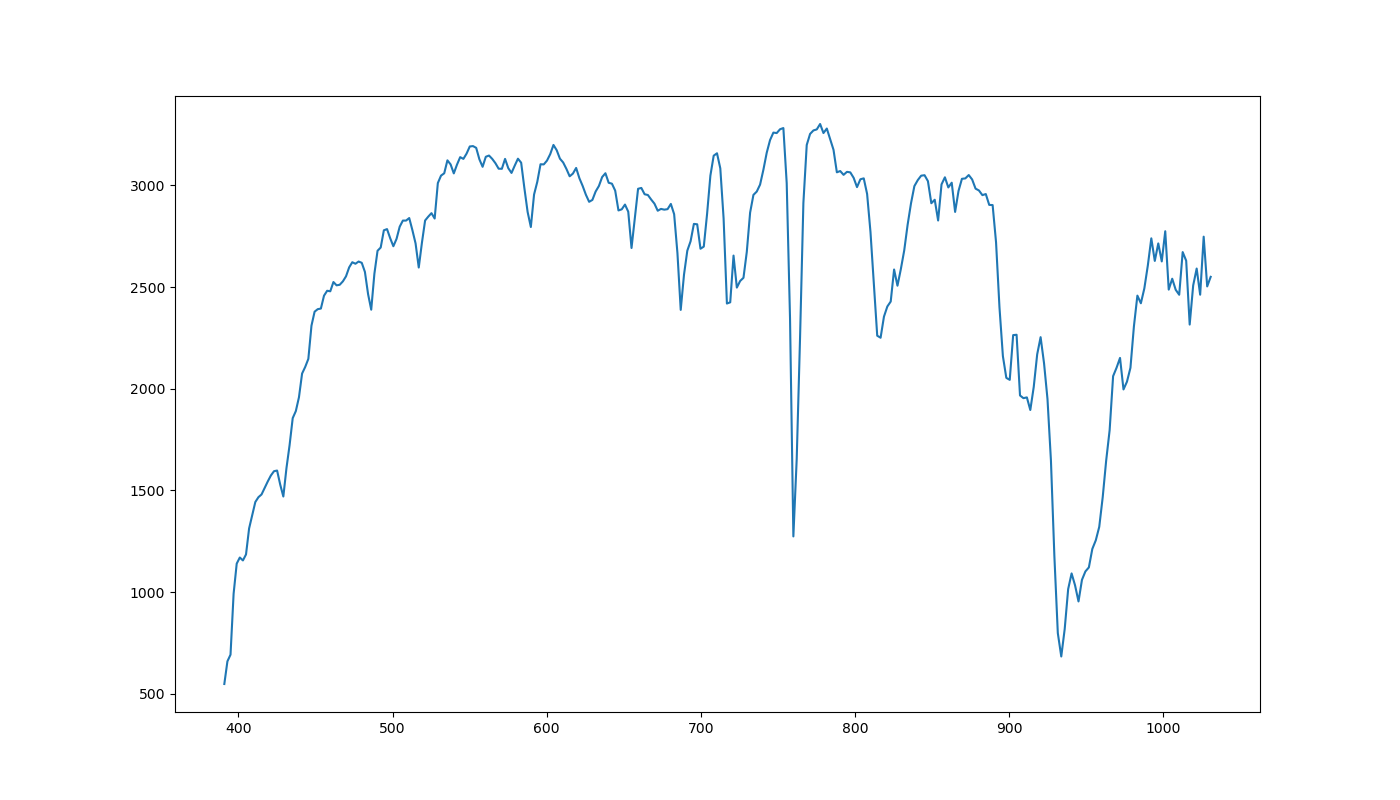

In [24]:
%matplotlib widget
plt.figure(figsize=(14,8))
_ = plt.plot(wl,rad_spec_sand)

The following Fraunhofer lines are quite clearly visible:
- 430.78 nm (G)
- 486.13 nm (F)
- 518.36 nm (b1)
- 589.30 nm (D1) + 589.59 (D2) = approx 589.45 nm 
- 656.28 nm (C)
- 686.72 nm (B)
- 759.37 nm (A)

H2O causes wider absorption bands around 725 nm, 820 and 940 nm, but has no defined "peak" wavelength.


![Effect on water on solar irradiance](https://water.lsbu.ac.uk/water/images/sun.gif) \
![Fraunhofer lines](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Solar_spectral_irradiance.svg/1024px-Solar_spectral_irradiance.svg.png)